<a href="https://colab.research.google.com/github/koroteevmv/ML_course/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
x = np.array([1.46, 1.13, -2.30, 1.74, 0.04, 
    -0.61, 0.32, -0.76, 0.58, -1.10, 
     0.87, 1.62, -0.53, -0.25, -1.07, 
    -0.38, -0.17, -0.32, -2.06, -0.88, ])

In [36]:
y = np.array([101.16, 78.44, -159.24, 120.72, 2.92, 
    -42.33, 22.07, -52.67, 40.32, -76.10, 
     59.88, 112.38, -36.54, -17.25, -74.24, 
    -26.57, -11.93, -22.31, -142.54, -60.74,])

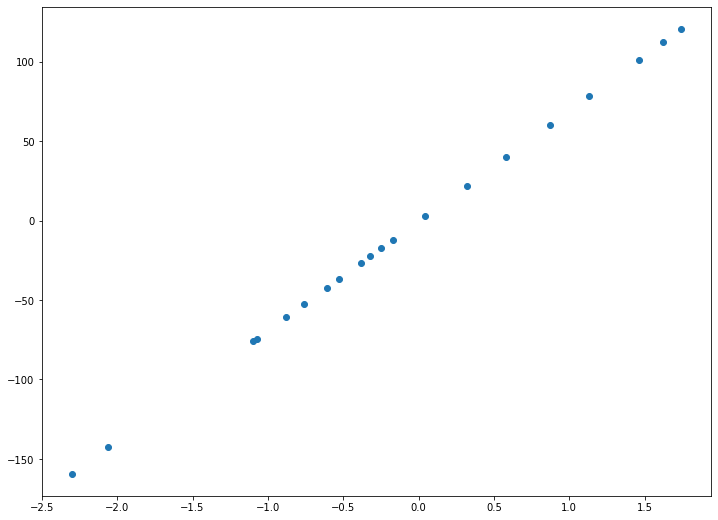

In [48]:
plt.figure(figsize=(12, 9))
plt.scatter(x, y)
plt.show()

In [44]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [45]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

0
0
initial error: 2937.6893075000007
error after gradient descent: 2255.2671834695575


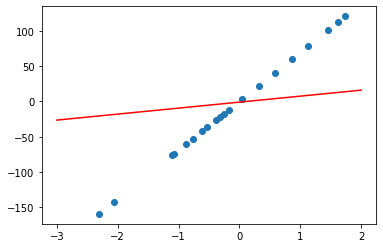

In [49]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure(figsize=(12, 9))
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [57]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.1, accuracy=0.01, max_steps=1000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

error after gradient descent: 0.04937633815778019


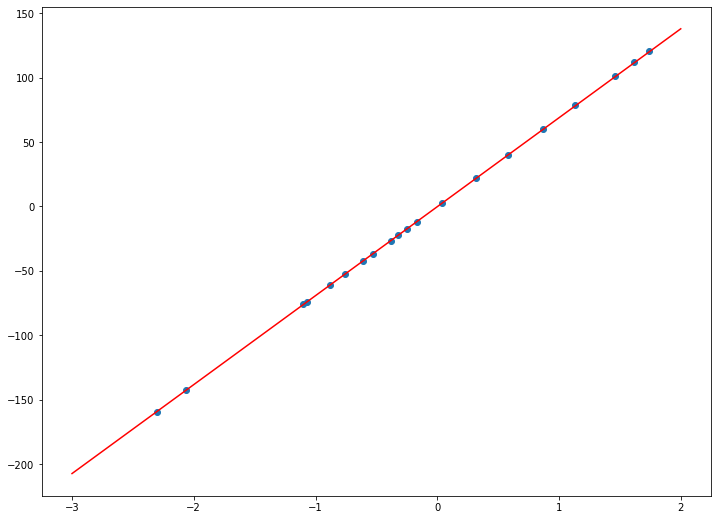

In [60]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure(figsize=(12, 9))
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

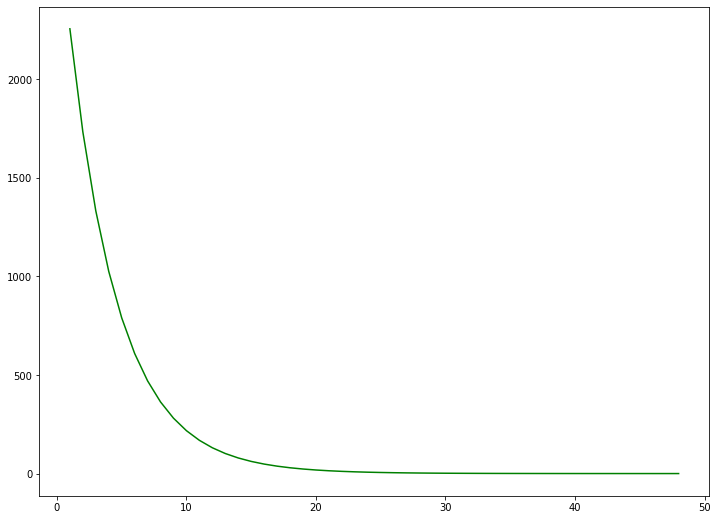

In [61]:
plt.figure(figsize=(12, 9))
plt.plot(steps, errors, 'g')
plt.show()